In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_path = './../../data/processed/'

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# here we will select 'well behaved' vs bad behaved firms.
# We will compute deviations from mean level, as well as annual growth rates for both groups. for imports and exports. 

In [ ]:
We have some parameters that combine with each other.
That is:
    
- Level of presence of the firm in the time series.
- Firm size (Quantile) which will determine also the n_q for aggregation
- Taking Growth rates vs differences from mean. # These two could come as colors.

In [ ]:
# How to make it? Firms belong to a quantile and have some presence level

In [3]:
col = 'ID'
df = pd.read_csv(data_path + col.replace(' ', '_')+'_Y.csv')

In [4]:
sales = df.loc[df.IMPORT == 0].groupby(['ID', 'YEAR'])['VART'].sum().unstack()

### LOG10 vs LN for the horizontal scale
logsales = np.log10(sales)
# logsales = np.log(cuadro) # LN

demlogsales = logsales.subtract(logsales.mean(1), axis = 0)


In [5]:
sizes = sales.loc[sales.sum(1).sort_values().index].sum(1)
parts = pd.cut(sizes.cumsum()/sizes.sum(), 10).sort_index()

In [13]:
parts

ID
0               (0.2, 0.3]
18           (-0.001, 0.1]
20           (-0.001, 0.1]
140          (-0.001, 0.1]
158          (-0.001, 0.1]
207          (-0.001, 0.1]
215          (-0.001, 0.1]
223          (-0.001, 0.1]
224          (-0.001, 0.1]
256          (-0.001, 0.1]
257          (-0.001, 0.1]
301          (-0.001, 0.1]
314          (-0.001, 0.1]
330          (-0.001, 0.1]
340          (-0.001, 0.1]
355          (-0.001, 0.1]
356          (-0.001, 0.1]
392          (-0.001, 0.1]
397          (-0.001, 0.1]
413          (-0.001, 0.1]
447          (-0.001, 0.1]
454          (-0.001, 0.1]
456          (-0.001, 0.1]
488          (-0.001, 0.1]
520          (-0.001, 0.1]
546          (-0.001, 0.1]
553          (-0.001, 0.1]
561          (-0.001, 0.1]
562          (-0.001, 0.1]
638          (-0.001, 0.1]
                 ...      
998967483    (-0.001, 0.1]
998999999    (-0.001, 0.1]
999009939    (-0.001, 0.1]
999143365    (-0.001, 0.1]
999187537    (-0.001, 0.1]
999289804    (-0.001, 0.1

In [20]:
for i, p in enumerate(parts.sort_values().unique()):
    df_ = demlogsales.loc[parts == p]
    print(df_.stack().std())

0.45543655666286975
0.5848573625007251
0.6044690321936704
0.6406413291611674
0.6649118026521204
0.6207829482076681
0.6109460319920706
0.722793564788947
0.519787330827853
1.3955009642170224


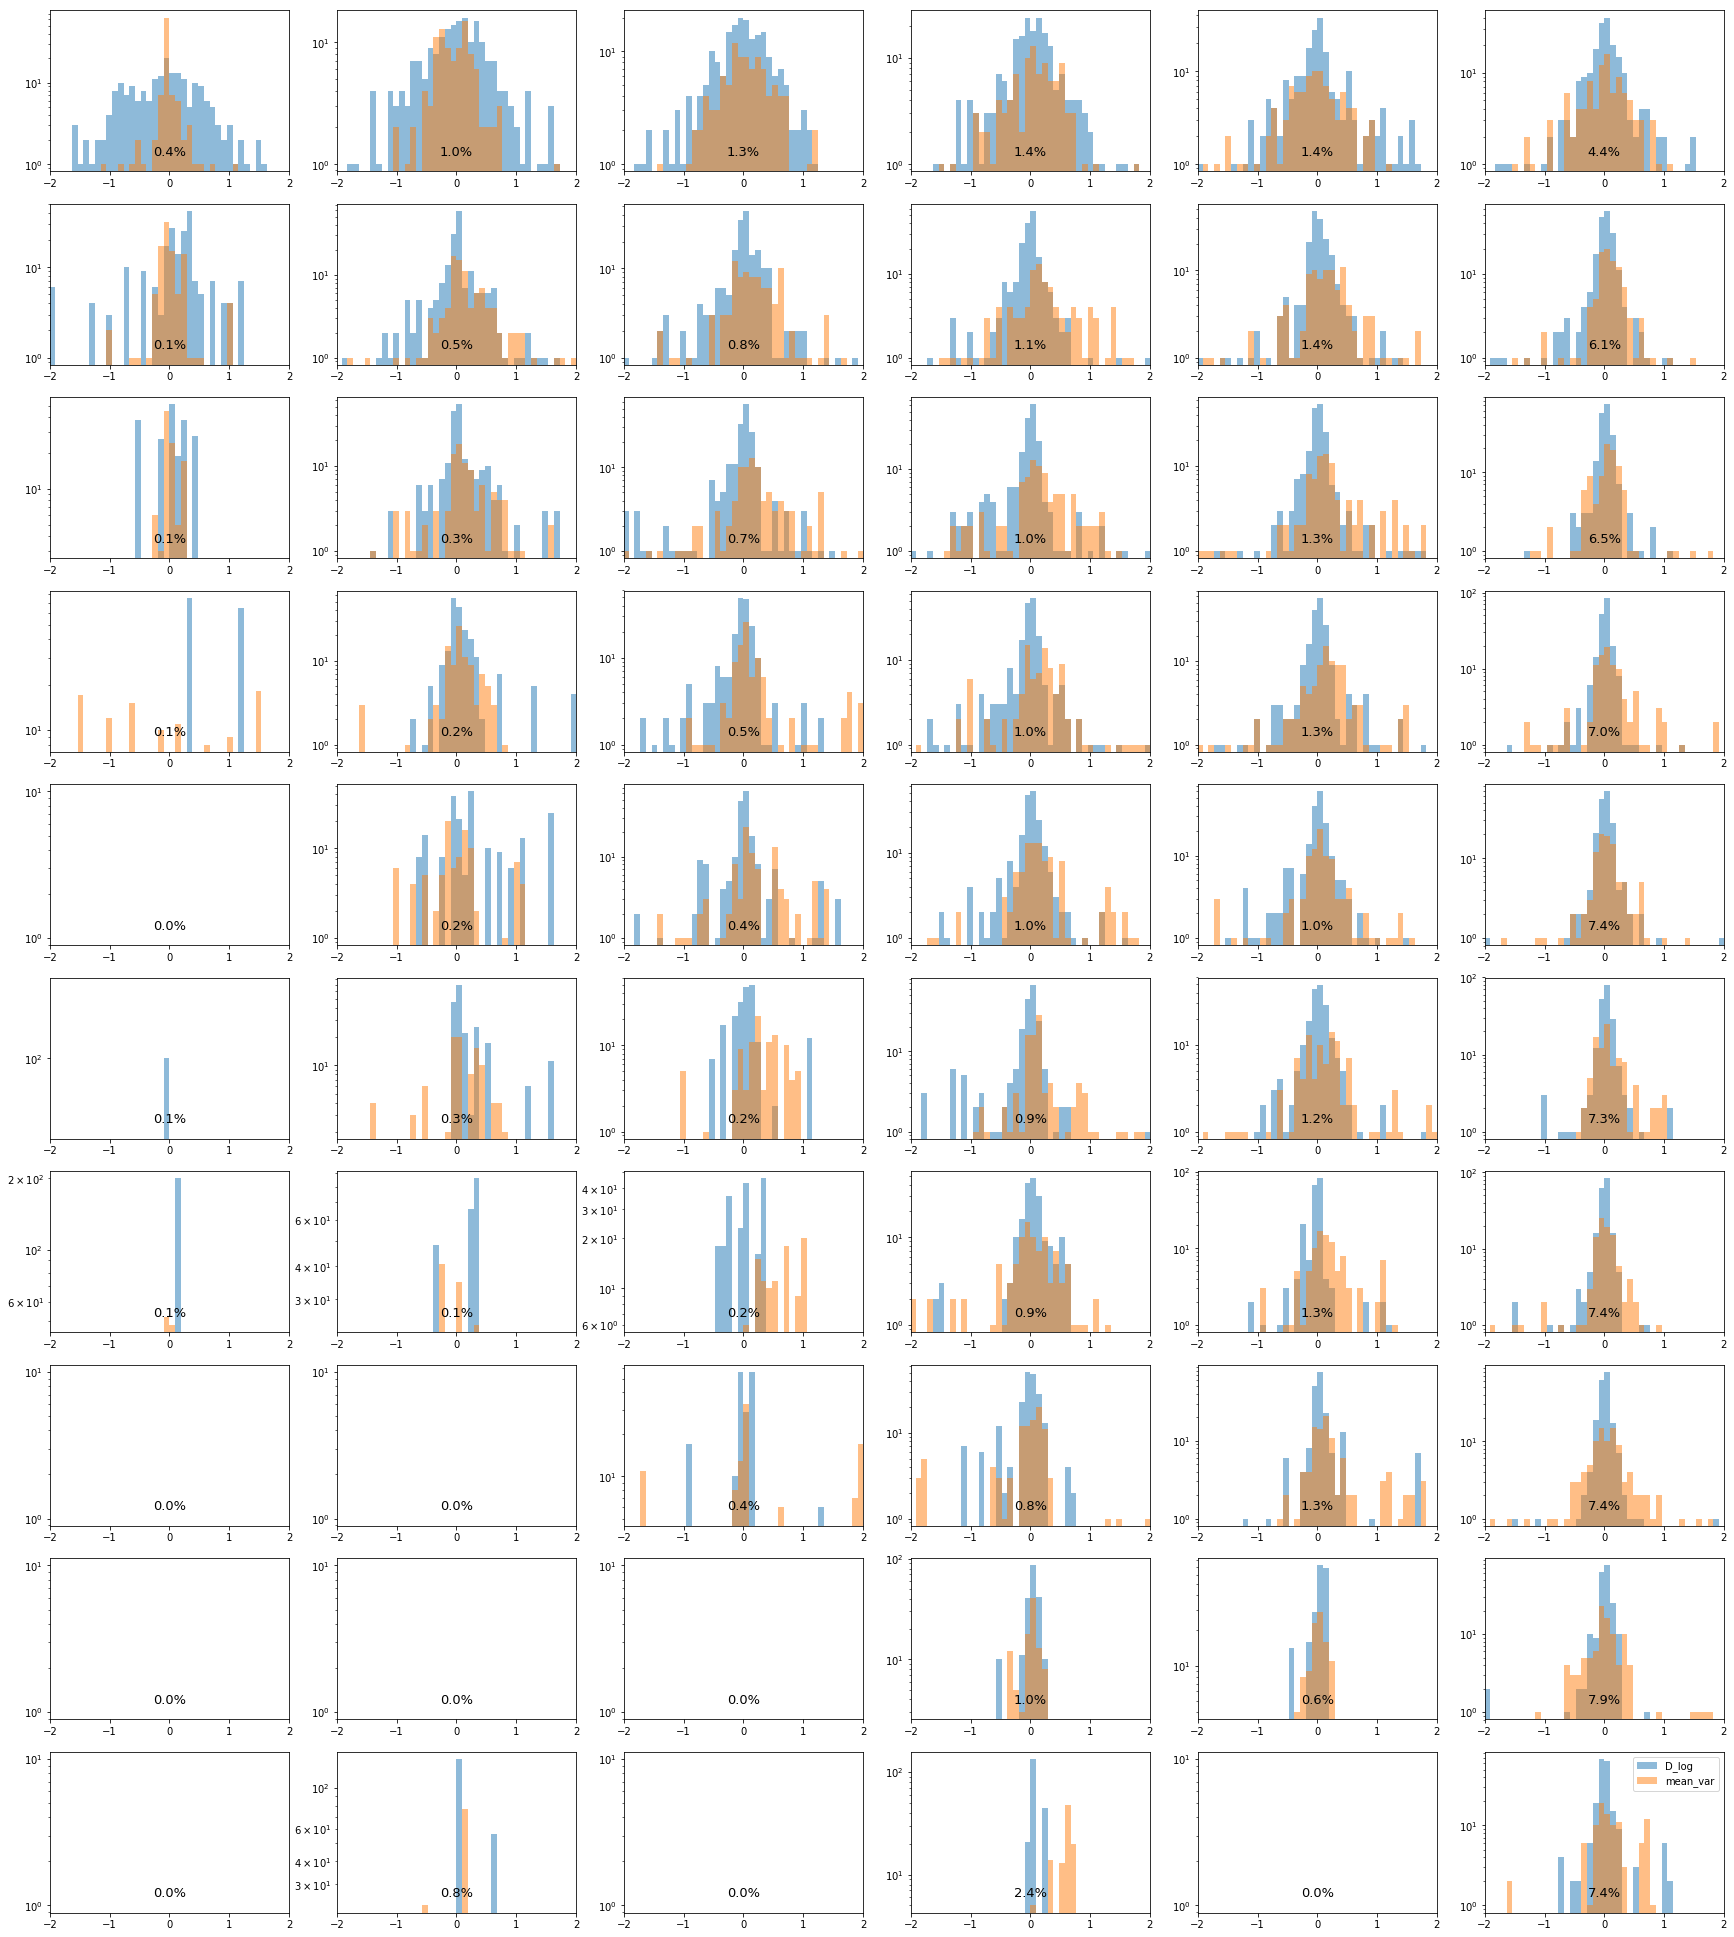

In [11]:
n = 6
Q = parts.nunique()

fig, axs = plt.subplots(Q, n, figsize = (5*n, 3.5*Q))

cut = 2.4

for i, p in enumerate(parts.sort_values().unique()):

    for j in range(n):
        ax = axs[i][j]
        log_rates = logsales.loc[(logsales.count(1)//3 == j) & (parts == p)].diff(axis = 1).stack()
        try:
            ax.hist(log_rates.loc[abs(log_rates) < cut].sample(200, replace = True), bins = np.arange(-cut, cut, 2*cut/50), alpha = .5, label = 'D_log')
        except:
            pass
        # wb_curve = ax.hist(log_rates.loc[abs(log_rates) < cut], bins = 150, alpha = .5)[0]
        ax.set_yscale('log')
        ax.set_xlim(-2, 2)


    for j in range(n):
        ax = axs[i][j]
        log_shocks = demlogsales.loc[(demlogsales.count(1)//3 == j) & (parts == p)].stack()
        try:
            ax.hist(log_shocks.loc[abs(log_shocks) < cut].sample(100, replace = True), bins = np.arange(-cut, cut, 2*cut/50), alpha = .5, label = 'mean_var')
        except:
            pass
        # wb_curve = ax.hist(log_rates.loc[abs(log_rates) < cut], bins = 150, alpha = .5)[0]
        ax.set_yscale('log')
        ax.set_xlim(-2, 2)

        value_pct = round(100*sales.loc[(sales.count(1)//3 == j) & (parts == p)].sum().sum()/sales.sum().sum(), 1)
        an = ax.annotate(str(value_pct)+'%', xy=(0.5,0.1), xycoords="axes fraction", fontsize = 13, horizontalalignment ='center')

plt.legend()
plt.show()


In [8]:
Conclusion... lo importante debe ser el n que tienen los quantiles. La verdadera curva (si es laplace, subbotin o que) es dificil de en los quantiles de pocas grandes empresas con lo cual no vale la pena gastarse mucho en eso. Mas bien, solo ver que hay dependencia inversa de std con n. For whatever curve. Igual hacerlo con gaussian y laplace. Ya fue...


SyntaxError: invalid syntax (<ipython-input-8-574361260a0f>, line 1)